# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('../data/Lockman-SWIRE/MIPS/dmu26_XID+MIPS_Lockman-SWIRE_cat.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J104834.640+553618.070,162.1443344,55.6050193754,953.652,1391.02,558.782,-0.263134,4.94239e-06,1.0021,959.0,0.0
HELP_J104844.111+553806.455,162.18379776,55.6351263157,5.835,15.6855,1.42353,-0.124418,5.0304e-06,nan,1428.0,0.0
HELP_J104909.113+554129.002,162.287969389,55.6913894849,16.5938,33.347,5.67531,3.73435e-05,4.89605e-06,1.00059,1623.0,0.0
HELP_J104910.454+554135.336,162.293559631,55.6931488629,47.5049,66.385,28.2103,3.73435e-05,4.89605e-06,nan,775.0,0.0
HELP_J104911.099+554218.548,162.29624584,55.7051523559,187.706,204.257,169.476,-0.00208601,5.06499e-06,1.00105,1615.0,0.0
HELP_J104919.290+554303.561,162.330374299,55.7176559469,39.9872,58.7282,22.266,-0.00208601,5.06499e-06,nan,2000.0,0.0
HELP_J104916.682+554301.860,162.319507377,55.7171832419,18.1097,33.5374,6.31178,-0.00208601,5.06499e-06,1.00147,1201.0,0.0
HELP_J104914.098+554211.057,162.308741513,55.7030714689,270.506,288.916,253.788,-0.00208601,5.06499e-06,nan,1763.0,0.0


In [5]:
from astropy import units as u

In [6]:
u.degree

Unit("deg")

In [7]:
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree
cat['F_MIPS_24'].unit=u.uJy
cat['FErr_MIPS_24_l'].unit=u.uJy
cat['FErr_MIPS_24_u'].unit=u.uJy

## Look at Symmetry of PDFs to determine depth level of catalogue

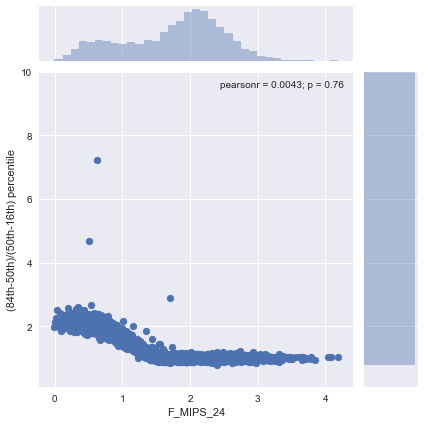

In [8]:
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
#g=sns.jointplot(x=np.log10(cat['F_MIPS_24']),y=skew,ylim=(0.1,10))
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][0:5000]),y=skew[0:5000],ylim=(0.1,10))


Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [10]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [11]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 20.0)


In [12]:
cat['flag_mips_24'][ind]=True


In [13]:
cat.write('../data/Lockman-SWIRE/MIPS/dmu26_XID+MIPS_Lockman-SWIRE_cat_20171214.fits', format='fits',overwrite=True)
